In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 라이브러리 임포트 및 한글 글꼴 설정
from matplotlib import font_manager, rc
import platform 
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
%matplotlib inline

data = pd.read_excel('data/danawa_data.xlsx')

In [40]:
data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
1,핸디/스틱청소기,원더스리빙,다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    241 non-null    object 
 1   회사명     241 non-null    object 
 2   제품      241 non-null    object 
 3   가격      241 non-null    int64  
 4   사용시간    218 non-null    float64
 5   흡입력     129 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.4+ KB


In [42]:
data.describe()

,가격,사용시간,흡입력
count,2.410000e+02,218.000000,129.000000
mean,2.968448e+05,43.389908,151.829457
std,2.837529e+05,21.263744,59.893411
min,0.000000e+00,7.000000,15.000000
25%,8.899000e+04,30.000000,115.000000
50%,1.790000e+05,40.000000,155.000000
75%,4.175400e+05,60.000000,200.000000
max,1.510190e+06,120.000000,250.000000


In [43]:
top_list = data.sort_values(['사용시간', '흡입력'], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
5,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,877880,120.0,200.0
16,핸디/스틱청소기,삼성전자,제트 VS20R9078S3,918120,120.0,200.0
76,핸디/스틱청소기,삼성전자,제트 VS20R9074S3,870910,120.0,200.0
109,핸디/스틱청소기,삼성전자,제트 VS20R9077Q3,931100,120.0,200.0
111,핸디/스틱청소기,삼성전자,제트 VS20R9074S2,845990,120.0,200.0


In [44]:
price_mean = data['가격'].mean()
suction_mean = data['흡입력'].mean()
use_time_mean = data['사용시간'].mean()
print("가격 평균값", price_mean)
print("흡입력 평균값", suction_mean)
print("사용시간 평균값", use_time_mean)

가격 평균값 296844.79253112036
흡입력 평균값 151.8294573643411
사용시간 평균값 43.38990825688074


In [45]:
# 가성비 좋은 제품 탐색
condition_data = data [
    (data['가격'] <= price_mean) & 
    (data['흡입력'] >= suction_mean) & 
    (data['사용시간'] >= use_time_mean)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0
13,핸디/스틱청소기,DIBEA,F20 맥스,222990,50.0,250.0
18,핸디/스틱청소기,DIBEA,M500 퀀텀,248640,50.0,250.0
42,핸디/스틱청소기,DIBEA,F20 프로,161970,50.0,220.0
73,핸디/스틱청소기,JDL,tech 타이푼 DV-889DC-X,137160,50.0,200.0
121,핸디/스틱청소기,샤오미,드리미 V9P,216720,60.0,200.0
124,핸디/스틱청소기,캐치웰,코드엑스,219000,60.0,220.0
127,핸디/스틱청소기,DIBEA,X30,259000,50.0,250.0


In [46]:
condition_data.count()

카테고리    18
회사명     18
제품      18
가격      18
사용시간    18
흡입력     18
dtype: int64

In [47]:
data['흡입력'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
236    False
237     True
238     True
239    False
240    False
Name: 흡입력, Length: 241, dtype: bool

In [48]:
# 결측값 없애기
chart_data = data.dropna(axis = 0)
chart_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,샤오미,드리미 V10,173900,60.0,220.0
1,핸디/스틱청소기,원더스리빙,다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A978,1005340,80.0,140.0
3,핸디/스틱청소기,델로라,V11 파워 300W,141000,70.0,220.0
4,핸디/스틱청소기,샤오미,드리미 V9,138800,60.0,200.0


In [49]:
chart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    123 non-null    object 
 1   회사명     123 non-null    object 
 2   제품      123 non-null    object 
 3   가격      123 non-null    int64  
 4   사용시간    123 non-null    float64
 5   흡입력     123 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.7+ KB


In [50]:
chart_data['사용시간'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
231    False
235    False
236    False
239    False
240    False
Name: 사용시간, Length: 123, dtype: bool

In [51]:
# 흡입력, 사용시간의 최댓값/최솟값 정리
suction_max = chart_data['흡입력'].max()
suction_mean = chart_data['흡입력'].mean()
use_time_max = chart_data['사용시간'].max()
use_time_mean = chart_data['사용시간'].mean()

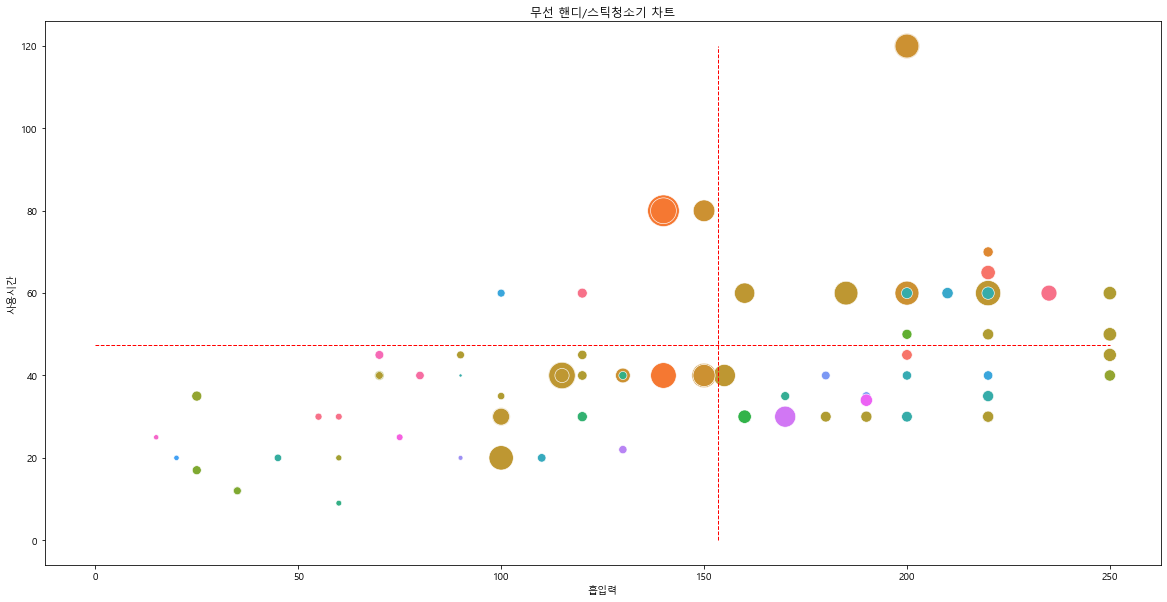

In [57]:
# 청소기 성능 시각화
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'], 
                data = chart_data, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max], [use_time_mean, use_time_mean], 'r--', lw = 1 )
plt.plot([suction_mean, suction_mean], [0, use_time_max], 'r--', lw = 1 )
plt.show()

In [58]:
# 인기 제품 20개 선택
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

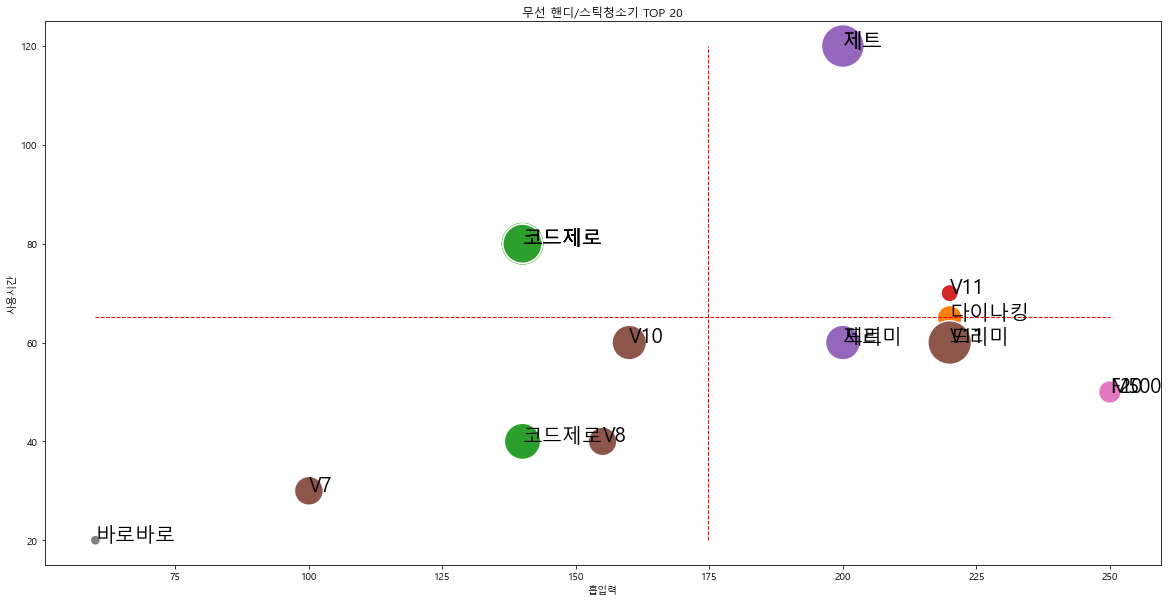

In [60]:
# 흡입력, 사용시간의 최댓값, 최솟값 구하기
suction_max = chart_data_selected['흡입력'].max()
suction_mean = chart_data_selected['흡입력'].mean()
use_time_max = chart_data_selected['사용시간'].max()
use_time_mean = chart_data_selected['사용시간'].mean()
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', 
                hue = chart_data_selected['회사명'], 
                data = chart_data_selected, sizes = (100, 2000),
                legend = False)
plt.plot([60, suction_max], [use_time_mean, use_time_mean], 'r--', lw = 1 )
plt.plot([suction_mean, suction_mean], [20, use_time_max], 'r--', lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
plt.show()

In [ ]:
# 크롤링

In [67]:
# 주피터에서 콘솔 명령어 : !
!pip install selenium
from selenium import webdriver

In [70]:
#chromedriver 저장 경로 지정
driver = webdriver.Chrome('C:\data\chromedriver')
driver.get('http://naver.com')

In [71]:
xpath='//*[@id="account"]'
driver.find_element_by_xpath(xpath).click()

In [73]:
elem_login = driver.find_element_by_id('id')
elem_login.clear()
elem_login.send_keys('********')
elem_login = driver.find_element_by_id('pw')
elem_login.clear()
elem_login.send_keys('*******')

In [74]:
# 태그 오른쪽 클릭->Copy->xpath 밑에 붙여넣기
# find_element_by_xpath(xpath) : xpath 위치 찾기
# click() : 로그인 버튼 클릭
xpath='//*[@id="log.login"]'
driver.find_element_by_xpath(xpath).click()

In [ ]:
# 서울 주유소 가격 정보 비교

In [75]:
from selenium import webdriver
driver = webdriver.Chrome('C:\data\chromedriver')
driver.get("http://www.opinet.co.kr")

In [77]:
driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [87]:
# 서울 클릭을 위한 xpath 확인
area = driver.find_element_by_xpath('//*[@id="SIDO_NM0"]')

In [88]:
area.send_keys('서울')

In [89]:
# 구/데이터 입력을 위한 xpath 확인
gu_list_raw = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')

In [93]:
# 구 리스트 확인 위해 find_elements_by_tag_name으로 option 태그 검색
gu_list = gu_list_raw.find_elements_by_tag_name('option')

In [94]:
#value 속성을 이용하여 구 리스트 획득
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [95]:
#gu_names에서 리스트 첫번째 값 입력하여 테스트 진행
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [97]:
xpath ='''//*[@id="searRgSelect"]/span'''
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [98]:
xpath = '''//*[@id="glopopd_excel"]/span'''
element_get_excel = driver.find_element_by_xpath(xpath).click()

In [100]:
import time
from tqdm import tqdm_notebook

# 반복문을 이용하여 모든 구 엑셀파일 다운로드 진행
for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    
    time.sleep(2)# 데이터 획득 위한 지연 시간

    xpath ='''//*[@id="searRgSelect"]/span'''
    element_sel_gu = driver.find_element_by_xpath(xpath).click()

    time.sleep(1)

    xpath = '''//*[@id="glopopd_excel"]/span'''
    element_get_excel = driver.find_element_by_xpath(xpath).click()

    time.sleep(1)

<ipython-input-100-5a88168ed7bc>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [101]:
import pandas as pd
from glob import glob

In [104]:
# station_files 변수에 각 엑셀 파일의 경로와 이름을 리스트로 저장
stations_files = glob('data/지역*.xls')
stations_files

['data\\지역_위치별(주유소) (1).xls',
 'data\\지역_위치별(주유소) (10).xls',
 'data\\지역_위치별(주유소) (11).xls',
 'data\\지역_위치별(주유소) (12).xls',
 'data\\지역_위치별(주유소) (13).xls',
 'data\\지역_위치별(주유소) (14).xls',
 'data\\지역_위치별(주유소) (15).xls',
 'data\\지역_위치별(주유소) (16).xls',
 'data\\지역_위치별(주유소) (17).xls',
 'data\\지역_위치별(주유소) (18).xls',
 'data\\지역_위치별(주유소) (19).xls',
 'data\\지역_위치별(주유소) (2).xls',
 'data\\지역_위치별(주유소) (20).xls',
 'data\\지역_위치별(주유소) (21).xls',
 'data\\지역_위치별(주유소) (22).xls',
 'data\\지역_위치별(주유소) (23).xls',
 'data\\지역_위치별(주유소) (24).xls',
 'data\\지역_위치별(주유소) (25).xls',
 'data\\지역_위치별(주유소) (3).xls',
 'data\\지역_위치별(주유소) (4).xls',
 'data\\지역_위치별(주유소) (5).xls',
 'data\\지역_위치별(주유소) (6).xls',
 'data\\지역_위치별(주유소) (7).xls',
 'data\\지역_위치별(주유소) (8).xls',
 'data\\지역_위치별(주유소) (9).xls']

In [105]:
# concat 명령으로 합쳐본다.
tmp_raw = []
for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
station_raw = pd.concat(tmp_raw)

In [106]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 0 to 14
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      484 non-null    object
 1   상호      484 non-null    object
 2   주소      484 non-null    object
 3   상표      484 non-null    object
 4   전화번호    484 non-null    object
 5   셀프여부    484 non-null    object
 6   고급휘발유   484 non-null    object
 7   휘발유     484 non-null    object
 8   경유      484 non-null    object
 9   실내등유    484 non-null    object
dtypes: object(10)
memory usage: 41.6+ KB


In [107]:
# 휘발유 데이터 저장.
stations = pd.DataFrame({'Oil_store': station_raw['상호'],
                        '주소': station_raw['주소'],
                        '가격': station_raw['휘발유'],
                        '셀프': station_raw['셀프여부'],
                        '상표': station_raw['상표']
                        })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1623,Y,SK에너지
1,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1625,Y,SK에너지
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1633,Y,현대오일뱅크
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1637,Y,GS칼텍스
4,대교주유소,서울 강남구 강남대로 640 (신사동),1645,N,SK에너지


In [108]:
# 구 이름만 추출
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1623,Y,SK에너지,강남구
1,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1625,Y,SK에너지,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1633,Y,현대오일뱅크,강남구
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1637,Y,GS칼텍스,강남구
4,대교주유소,서울 강남구 강남대로 640 (신사동),1645,N,SK에너지,강남구


In [109]:
# unique() 이용해서 데이터 검사 수행
stations['구'].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [110]:
stations['가격'].unique() #가격에 '-'가 있음

array(['1623', '1625', '1633', '1637', '1645', '1648', '1655', '1683',
       '1685', '1698', '1719', '1723', '1735', '1737', '1739', '1749',
       '1770', '1774', '1788', '1794', '1808', '1810', '1816', '1877',
       '1967', '1988', '1991', '2026', '2058', '2075', '2085', '2088',
       '2089', '2138', '2225', '-', 1573, 1575, 1582, 1584, 1585, 1588,
       1589, 1635, 1645, 1648, 1649, 1663, '1585', '1595', '1597', '1599',
       '1605', '1634', '1658', '1669', '1678', 1609, 1624, 1628, 1629,
       1634, 1644, 1673, 1755, '1598', '1647', '1657', '1716', '1728',
       '1798', '1867', '1897', 1599, 1604, 1607, 1612, 1617, 1627, 1637,
       1638, 1542, 1613, 1619, 1623, 1625, 1636, 1639, 1647, 1679, 1690,
       1698, 1715, 1748, 1795, 1852, 1997, 1998, 2117, 1598, 1614, 1668,
       1678, 1687, 1696, 1729, 1759, 1848, 1889, 1895, 1898, 1578, 1587,
       1597, 1605, 1608, 1618, 1658, 1699, 1600, 1610, 1640, 1655, 1659,
       1665, 1858, 1565, 1595, 1837, 1853, 1643, 1683, 1688, 1

In [111]:
#가격에 '-' 값만 추출
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
36,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
37,지에스칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,-,Y,GS칼텍스,강남구
38,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
18,능주주유소,서울 동대문구 청계천로 431 (신설동),-,N,SK에너지,동대문구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
27,지에스칼텍스㈜ 화일주유소,서울 영등포구 도림로 415,-,Y,GS칼텍스,영등포구
28,현대오일뱅크㈜직영 대일셀프주유소,서울 영등포구 영등포로 168,-,Y,현대오일뱅크,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
13,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,-,Y,GS칼텍스,중랑구


In [114]:
# '-' 문자가 포함된 데이터 제외
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1623,Y,SK에너지,강남구
1,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1625,Y,SK에너지,강남구
2,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1633,Y,현대오일뱅크,강남구
3,방죽주유소,서울 강남구 밤고개로 215 (율현동),1637,Y,GS칼텍스,강남구
4,대교주유소,서울 강남구 강남대로 640 (신사동),1645,N,SK에너지,강남구


In [116]:
# 가격 float 형 변환.
stations['가격'] = [float(value) for value in 
stations['가격']]

In [119]:
# reset_index 이용하여 index 재정의
stations.reset_index(inplace=True)
del stations['index']# 기존 인덱스 삭제

In [121]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  471 non-null    object 
 1   주소         471 non-null    object 
 2   가격         471 non-null    float64
 3   셀프         471 non-null    object 
 4   상표         471 non-null    object 
 5   구          471 non-null    object 
dtypes: float64(1), object(5)
memory usage: 22.2+ KB


In [124]:
# 한글문제 해결
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

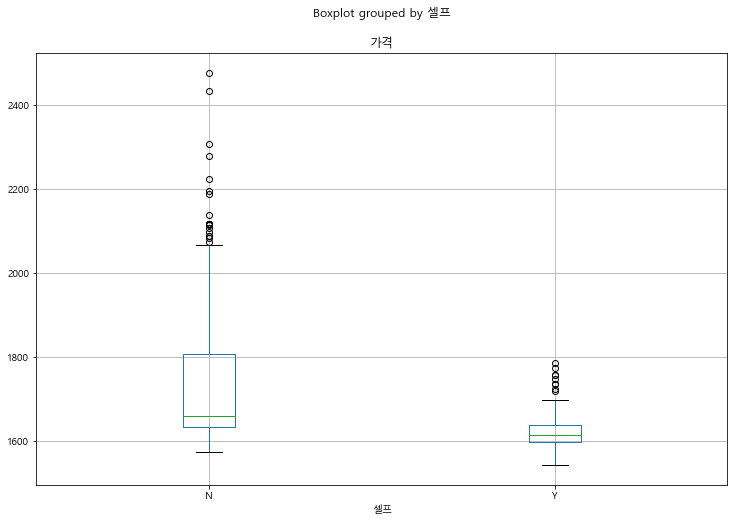

In [125]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

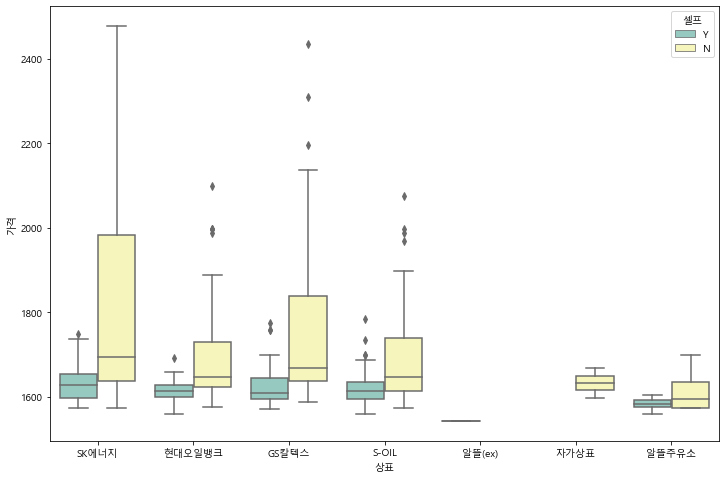

In [127]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

C:\Users\harry\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


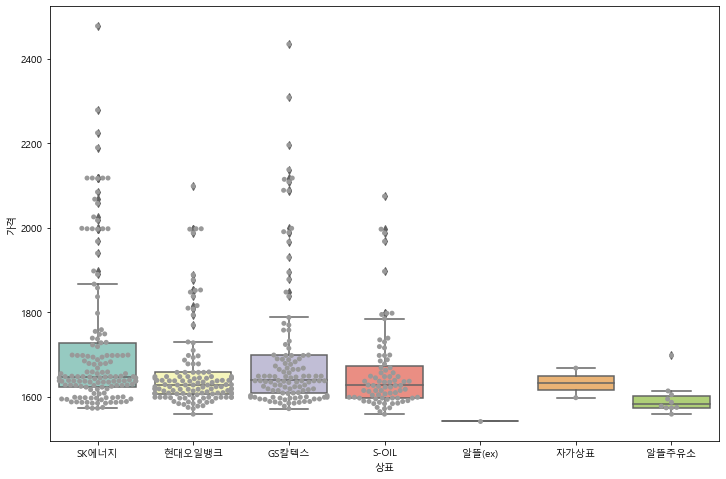

In [128]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()


In [130]:
!pip install folium

In [ ]:
# 구글맵 인증키 사용

In [133]:
!pip install googlemaps

  Created wheel for googlemaps: filename=googlemaps-4.4.5-py3-none-any.whl size=37982 sha256=9fd8160c43ca58f9f997c8460db9a234b8483be0017fa3539fa470b47488c535
  Stored in directory: c:\users\harry\appdata\local\pip\cache\wheels\ba\e0\b5\c1a0de4000d5c565052ded4d5e77bf185674de0f52aaa37d81
Successfully built googlemaps


In [134]:
import json
import folium
import googlemaps

In [136]:
gmaps_key = 'google platform key' # API설정할 때 얻은 key
gmaps = googlemaps.Client(key=gmaps_key)
gmaps.geocode('경남대학교', language='ko')

[{'address_components': [{'long_name': '７',
    'short_name': '７',
    'types': ['premise']},
   {'long_name': '경남대학로',
    'short_name': '경남대학로',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '마산합포구',
    'short_name': '마산합포구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '창원시',
    'short_name': '창원시',
    'types': ['locality', 'political']},
   {'long_name': '경상남도',
    'short_name': '경상남도',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '631-260',
    'short_name': '631-260',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 경상남도 창원시 마산합포구 경남대학로 7',
  'geometry': {'location': {'lat': 35.18035, 'lng': 128.553385},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 35.18169898029149,
     'lng': 128.5547339802915},
    'southwest': {'lat': 35.1790010197085, 'lng':

In [137]:
university_name=['경남대학교', '경상대학교', '창원대학교']
university_address = []
university_lat = []
university_lng = []

for name in university_name:
    tmp = gmaps.geocode(name, language='ko')
    university_address.append(tmp[0].get('formatted_address'))

    tmp_loc = tmp[0].get('geometry')
    university_lat.append(tmp_loc['location']['lat'])
    university_lng.append(tmp_loc['location']['lng'])

for address, lat, lng, name in zip(university_address, university_lat, university_lng, university_name):
    print('학교명:', name)
    print('주소: ', address)
    print('위도: ', str(lat), ' 경도:', str(lng))
    print('-' *70)

학교명: 경남대학교
주소:  대한민국 경상남도 창원시 마산합포구 경남대학로 7
위도:  35.18035  경도: 128.553385
----------------------------------------------------------------------
학교명: 경상대학교
주소:  대한민국 경상남도 진주시 가좌동 진주대로 501
위도:  35.1531629  경도: 128.0994469
----------------------------------------------------------------------
학교명: 창원대학교
주소:  대한민국 경상남도 창원시 의창구 봉림동 창원대학로 20
위도:  35.245595  경도: 128.691953
----------------------------------------------------------------------


In [139]:
# pivot_table을 이용해서 구별 가격 정보로 변경하고 가격 평균값 정리.
import numpy as np
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1828.888889
강동구,1714.437500
강북구,1591.461538
강서구,1635.909091
관악구,1655.866667


In [140]:
# 서울시 구별 정보에 대해 지도로 표현
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

C:\Users\harry\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [141]:
# cctv 인구 연관성

In [144]:
import pandas as pd
CCTV=pd.read_csv('data/CCTV.csv')
CCTV.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [146]:
CCTV.rename(columns={'기관명':'구별'}, inplace=True)
CCTV.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [147]:
pop_seoul=pd.read_excel('data/population.xls')
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [148]:
# 필요한 데이터 선별
pop_seoul=pd.read_excel('data/population.xls', header=2, usecols=(1,3,6,9,13))
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [149]:
#column명 변경
pop_seoul.columns=['구별','인구수','한국인', '외국인', '고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [150]:
CCTV.sort_values(by='소계',ascending=True).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [151]:
CCTV.sort_values(by='소계',ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [153]:
CCTV['최근증가율']=(CCTV['2016년']+CCTV['2015년']+CCTV['2014년'])/(CCTV['2013년도 이전']) *100
CCTV.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [154]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [155]:
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


In [156]:
# 합계 삭제
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [157]:
pop_seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [158]:
# nan 삭제하기 위해 non 행 확인
pop_seoul[pop_seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [159]:
# NaN 삭제
pop_seoul.drop([26], inplace=True)
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


In [160]:
pop_seoul['외국인비율']=(pop_seoul['외국인']/pop_seoul['인구수'])*100
pop_seoul['고령자비율']=(pop_seoul['고령자']/pop_seoul['인구수'])*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [166]:
pop_seoul.sort_values(by='외국인비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [167]:
pop_seoul.sort_values(by='고령자비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [168]:
result_data=pd.merge(CCTV,pop_seoul, on='구별')#구별 column으로 병합
result_data.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [169]:
# 의미 없는 column 제거
result_data.drop(['2013년도 이전','2014년','2015년','2016년'], axis=1, inplace= True)
result_data.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [170]:
# 구별 column을 index로 설정
result_data.set_index('구별', inplace=True)
result_data.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [171]:
# 전체 column 간 상관관계 분석
'''상관계수의 절대값이 클수록 두 데이터는 관계가 있음
ex) 상관계수의 절대값이 0.1 이하면 거의 무시, 0.3 이하면 약한
상관관계, 0.7 이하면 뚜렷한 상관관계'''
result_data.corr()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.343016,0.306342,0.304287,-0.023786,0.255196,-0.136074,-0.280786
최근증가율,-0.343016,1.000000,-0.093068,-0.082511,-0.150463,-0.070969,-0.044042,0.185089
인구수,0.306342,-0.093068,1.000000,0.998061,-0.153371,0.932667,-0.591939,-0.669462
한국인,0.304287,-0.082511,0.998061,1.000000,-0.214576,0.931636,-0.637911,-0.660812
외국인,-0.023786,-0.150463,-0.153371,-0.214576,1.000000,-0.155381,0.838904,-0.014055
고령자,0.255196,-0.070969,0.932667,0.931636,-0.155381,1.000000,-0.606088,-0.380468
외국인비율,-0.136074,-0.044042,-0.591939,-0.637911,0.838904,-0.606088,1.000000,0.267348
고령자비율,-0.280786,0.185089,-0.669462,-0.660812,-0.014055,-0.380468,0.267348,1.000000


In [172]:
# 특정 column 간 상관관계 분석
result_data[['소계','고령자비율']].corr()

,소계,고령자비율
소계,1.000000,-0.280786
고령자비율,-0.280786,1.000000


In [173]:
result_data[['소계','외국인비율']].corr()

,소계,외국인비율
소계,1.000000,-0.136074
외국인비율,-0.136074,1.000000


In [174]:
result_data[['소계','인구수']].corr()

,소계,인구수
소계,1.000000,0.306342
인구수,0.306342,1.000000


<AxesSubplot:>

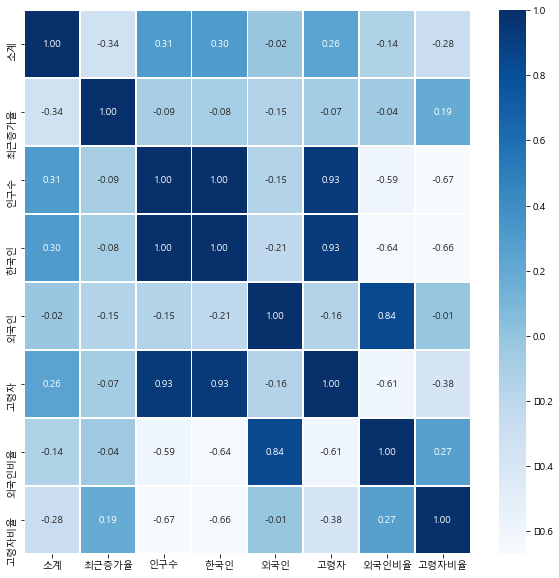

In [176]:
# 시각화
# 히트맵

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data = result_data.corr(), annot=True,
            fmt = '.2f', linewidths=.5, cmap='Blues')

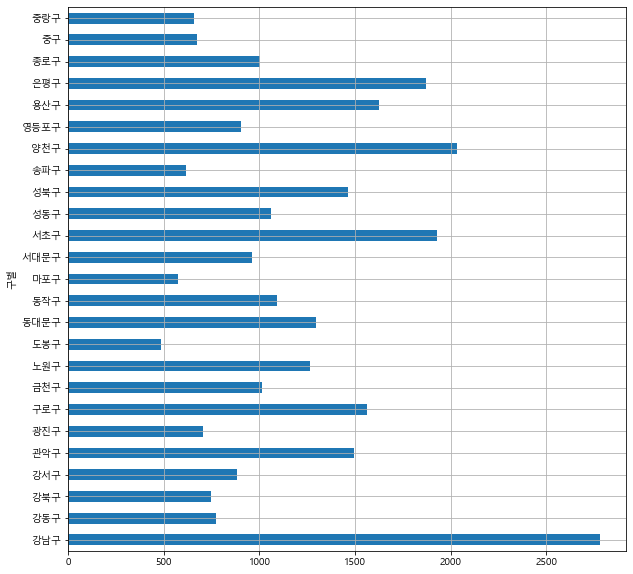

In [190]:
result_data['소계'].plot(kind='barh', grid=True,
                       figsize=(10,10))
plt.show()

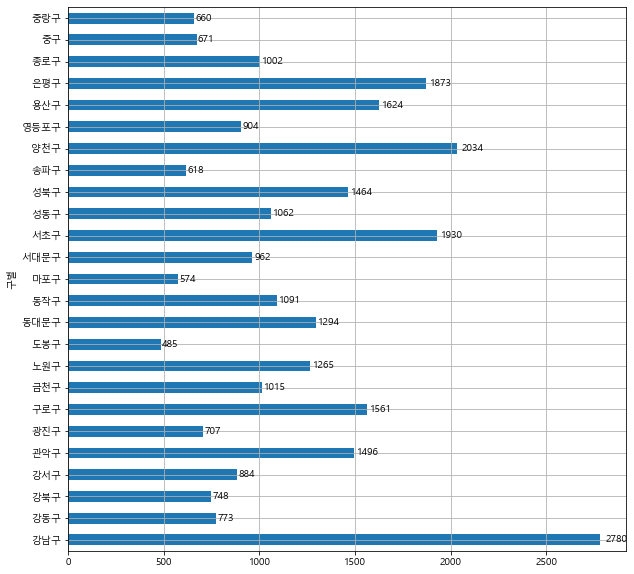

In [188]:
ax=result_data['소계'].plot(kind='barh', grid=True, figsize=(10, 10))
ax.ylable='구별'
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.d"%(width), va='center')

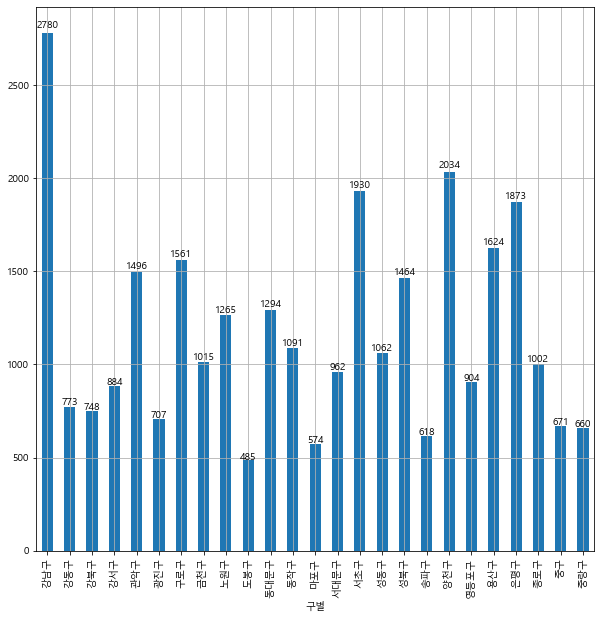

In [191]:
ax=result_data['소계'].plot(kind='bar', grid=True, figsize=(10, 10))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.text(left+width/2, height*1.01,"%d"%(height), ha='center')

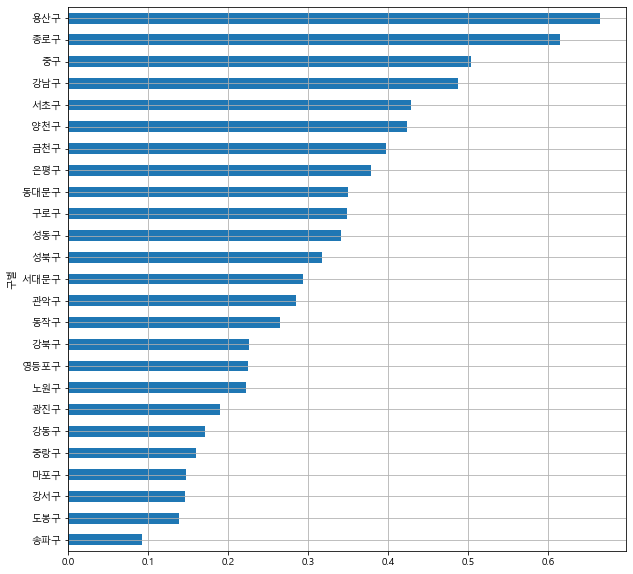

In [192]:
# 인구대비CCTV 비율적용하여 정렬.
result_data['CCTV비율'] = result_data['소계'] / result_data['인구수'] *100
result_data['CCTV비율'].sort_values().plot(kind='barh', grid=True, 
figsize=(10,10))
plt.show()

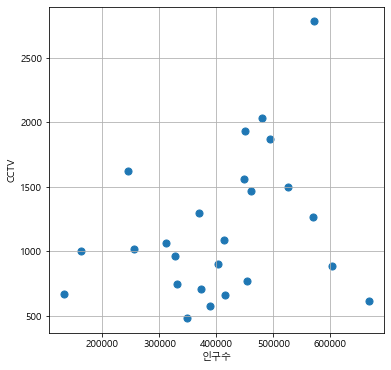

In [193]:
# scatter 그래프 적용
plt.figure(figsize=(6,6))
plt.scatter(result_data['인구수'], result_data['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

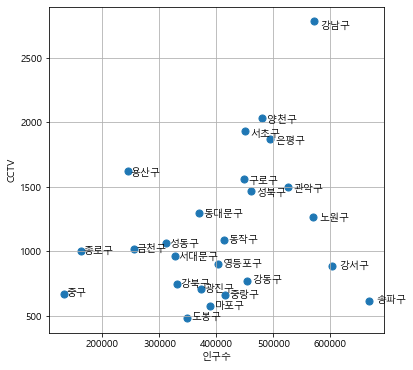

In [195]:
plt.figure(figsize=(6,6))
plt.scatter(result_data['인구수'], result_data['소계'], s=50)
for n in range(25): # 구별 레이블 표시
    plt.text(result_data['인구수'][n]*1.02, result_data['소계'][n]*0.98, result_data.index[n], fontsize=10)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

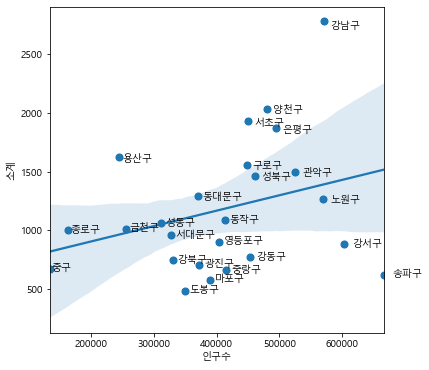

In [201]:
#seaborn 라이브러리 적용
import seaborn as sns

fig = plt.figure(figsize=(6, 6))
plt.scatter(result_data['인구수'], result_data['소계'], s=50)
for n in range(25): # 구별 레이블 표시
    plt.text(result_data['인구수'][n]*1.02, result_data['소계'][n]*0.98, result_data.index[n], fontsize=10)

# 선형회귀선 표시
sns.regplot(x='인구수', #x축 변수
            y='소계', #y축 변수
            data=result_data) #데이터
plt.show()

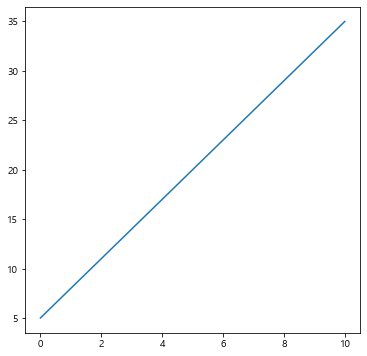

In [202]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
t = np.arange(0, 10, 0.01) #x축 설정
y = 3*t + 5 #직선을 그리기 위한 기울기, 절편
plt.figure(figsize=(6,6)) 
plt.plot(t, y)
plt.show() 

In [203]:
#polyfit 함수로 다항식의 계수 구하기
fp1=np.polyfit(result_data['인구수'],result_data['소계'],1) # 1차 방정식 계수 구하기

In [205]:
fp1

array([1.30916415e-03, 6.45066497e+02])

In [206]:
f1=np.poly1d(fp1) # 1차 방정식 만들기

In [209]:
f1

poly1d([1.30916415e-03, 6.45066497e+02])

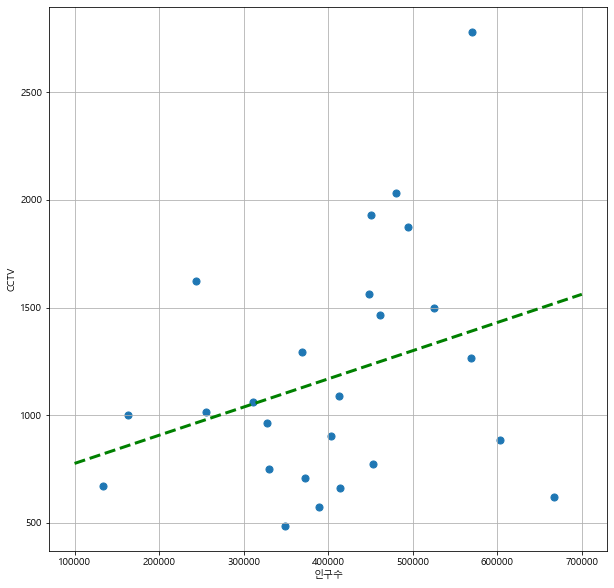

In [222]:
fx=np.linspace(100000,700000,100)
plt.figure(figsize=(10,10))
plt.scatter(result_data['인구수'],result_data['소계'],s=50)
plt.plot(fx,f1(fx),ls='dashed', lw=3, color='g') # 직선 그리기
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

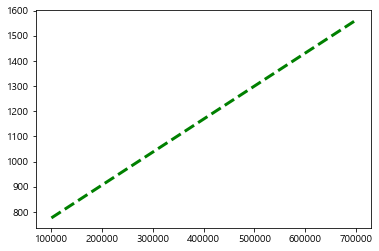

In [251]:
fp1=np.polyfit(result_data['인구수'], result_data['소계'],1)
f1=np.poly1d(fp1)
fx=np.linspace(100000,700000,100)
result_data['오차']=np.abs(result_data['소계']- f1(result_data['인구수']))
df_sort=result_data.sort_values(by='오차', ascending=False)
df_sort.head()
result_data.to_csv('data/CCTV_result.csv', sep=',', encoding='utf-8')

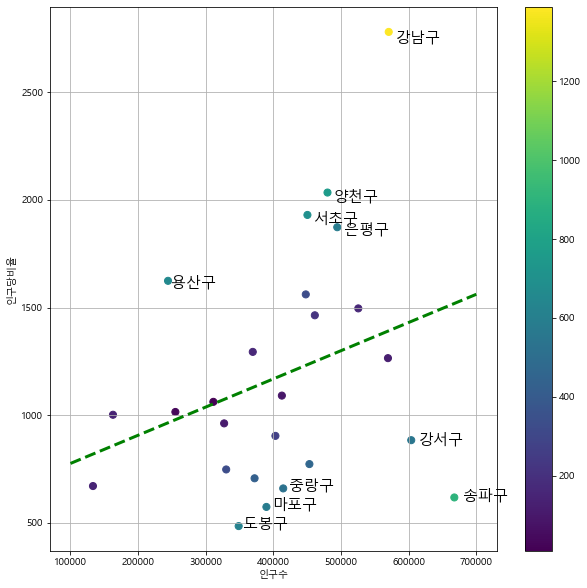

In [226]:
plt.figure(figsize=(10,10))
plt.scatter(result_data['인구수'],result_data['소계'],c=result_data['오차'], s=50)
plt.plot(fx,f1(fx),ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704",용산구
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015",성북구
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227",동대문구
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519",마포구
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961",영등포구


In [ ]:
# 서울시 범죄 현황 분석

In [228]:
import numpy as np
import pandas as pd
# 살인, 강도, 강간, 절도, 폭력이라는 5대 범죄에 대한 발생 건수와 검거 건수.
df = pd.read_csv('data/crime_in_Seoul.csv', encoding='euc-kr')
df.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170"
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070"
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711"
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861


In [229]:
import googlemaps
# 자신의 api 키 입력
gmaps_key='google key'
gmaps = googlemaps.Client(key=gmaps_key)
# Google Maps를 사용하여 '서울중부경찰서' 검색
gmaps.geocode('서울중부경찰서', language='ko')

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [ ]:
# 위 리스트에 딕셔너리 들어있다. 리스트의 원소는 1개
# tmp[0] -> 딕셔너리 자체를 뜻함.

In [232]:
station_name=[]

for name in df['관서명']:
    station_name.append('서울' + str(name[:-1]) + '경찰서')

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [233]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get('formatted_address')) # 경찰서 주소 추가
    tmp_loc = tmp[0].get('geometry') 
    station_lat.append(tmp_loc['location']['lat']) # 경찰서 위치의 위도 추가
    station_lng.append(tmp_loc['location']['lng']) # 경찰서 위치의 경도 추가
    print(name + '-->' + tmp[0].get('formatted_address'))

서울중부경찰서-->대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서-->대한민국 서울특별시 중구 회현동 한강대로 410
서울서대문경찰서-->대한민국 서울특별시 서대문구 충현동 통일로 113
서울혜화경찰서-->대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 백범로 329
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동 보문로 170
서울동대문경찰서-->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울마포경찰서-->대한민국 서울특별시 마포구 아현동 마포대로 183
서울영등포경찰서-->대한민국 서울특별시 영등포구 영등포동1가 618-7
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-->대한민국 서울특별시 은평구 녹번동 진흥로 58
서울강북경찰서-->대한민국 서울특별시 강북구 번1동 오패산로 406
서울금천경찰서-->대한민국 서울특별시 금천구 시흥1동 시흥대로73길 50
서울중랑경찰서-->대한민국 서울특별시 중랑구 신내동 신내역로3길 40-10
서울강남경찰서-->대한민국 서울특별시 강남구 대치동 테헤란로114길 11
서울관악경찰서-->대한민국 서울특별시 관악구 청룡동 관악로5길 33
서울강서경찰서-->대한민국 서울특별시 강서구 화곡동 화곡로 308
서울강동경찰서-->대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서-->대한민국 서울특별시 성북구 종암동 종암로 135
서울구로경찰서-->대한민국 서울특별시 구로구 구로동 가마산로 235
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서-->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울송파경찰서-->대한민국 서울특별시 송파구 가락동

In [235]:
gu_name=[]

for name in station_address:
    tmp = name.split() 
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0] 
    gu_name.append(tmp_gu)

df['구별'] = gu_name
df.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",중구
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",종로구
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,중구
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",서대문구
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,종로구


In [237]:
# 생성한 데이터프레임 저장
df.to_csv('data/crime_in_Seoul_gu_name.csv', sep=',', encoding='utf-8')

In [ ]:
# 저장하면 index와 columns 네임에 자동으로 label인덱스 새로 붙는다.
# 저장 파일과 위 비교

In [238]:
# 저장한 csv 파일 읽기
df_raw =pd.read_csv('data/crime_in_Seoul_gu_name.csv', thousands=',', encoding='utf-8')
df_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [239]:
#index_col=0을 사용하여 index 변경
df_raw = pd.read_csv('data/crime_in_Seoul_gu_name.csv', thousands=',', encoding='utf-8', index_col=0)
df_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [ ]:
# 한 구에 경찰서가 여러 개일 경우 합치기

In [240]:
# pivot_table을 이용하여 관서별에서 구별로 변경
crime_anal = pd.pivot_table(df_raw, index='구별',aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [242]:
# 각 검거율 계산하여 column 생성
crime_anal['강간검거율'] = crime_anal['강간 검거'] / crime_anal['강간 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거'] / crime_anal['강도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거'] / crime_anal['살인 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거'] / crime_anal['절도 발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력 검거'] / crime_anal['폭력 발생'] * 100

In [243]:
# 검거 건수는 검거율로 대체할 수 있어서 삭제
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157


In [245]:
#검거율이 100 넘는 숫자는 100으로 수정
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [246]:
# 컬럼명에 발생이라는 단어 삭제.
crime_anal.rename(columns = {'강간 발생':'강간',
                             '강도 발생':'강도',
                             '살인 발생':'살인',
                             '절도 발생':'절도',
                             '폭력 발생':'폭력'},
                  inplace=True)

crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157


In [248]:
# 발생 건수 단위가 다름
#발생 건수 정규화
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

# MinMaxScaler() -> columns간 데이터 단위가 크게 다를때, 정규화 시키는 함수
x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_norm = pd.DataFrame(x_scaled, columns = col,index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157


In [252]:
# CCTV 데이터 활용
result_CCTV = pd.read_csv('data/CCTV_result.csv', encoding='UTF-8', index_col='구별')
crime_anal_norm[['인구수','CCTV']] = result_CCTV[['인구수','소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496


In [253]:
# 각 범죄 발생 건수에 대해 합을 구해 '범죄'라는 column 생성
col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col],axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342


In [254]:
# 각 검거율 합을 구해 '검거'라는 column 생성
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,77.728285,85.714286,76.923077,42.857143,86.484594,570500.0,2780,4.857843,369.707384
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,78.846154,100.000000,75.000000,33.347422,82.890855,453233.0,773,1.286607,370.084431
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,82.352941,92.857143,100.000000,43.096234,88.637222,330192.0,748,1.641616,406.943540
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.000000,100.000000,60.114504,84.752105,603772.0,884,2.333944,417.767372
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,69.062500,100.000000,88.888889,30.561715,80.109157,525515.0,1496,2.860342,368.622261


C:\Users\harry\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\harry\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


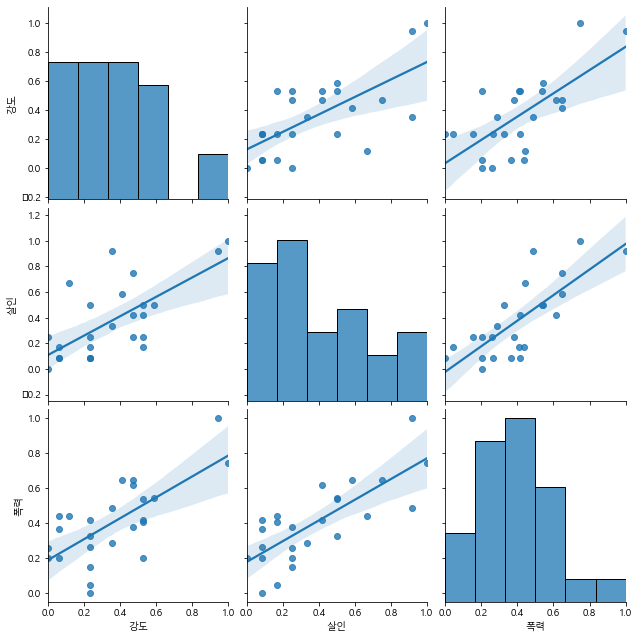

In [256]:
# 강도와 폭력, 살인과 폭력, 강도와 살인의 상관관계 확인
sns.pairplot(crime_anal_norm,
             vars=['강도', '살인', '폭력'],
             kind='reg', height=3)
plt.show()

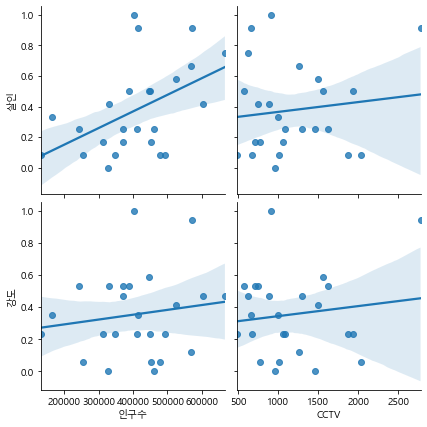

In [257]:
# 인구수, CCTV개수와 살인, 강도의 상관관계
sns.pairplot(crime_anal_norm,
             x_vars=['인구수', 'CCTV'],
             y_vars=['살인', '강도'],
             kind='reg', height=3)
plt.show()

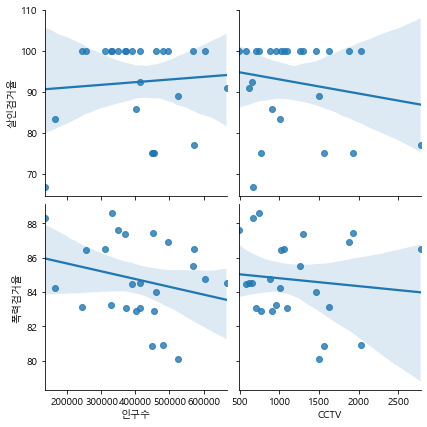

In [258]:
#인구수, CCTV와 살인검거율, 폭력검거율의 상관관계
sns.pairplot(crime_anal_norm,
             x_vars=['인구수', 'CCTV'],
             y_vars=['살인검거율', '폭력검거율'], 
             kind='reg', height=3)
plt.show()

In [259]:
# 검거율의 합계인 검거 항목 최고 값을 100으로 한정하고 그 값으로 정렬
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_nrom_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_nrom_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,100.000000,100.0,100.0,44.967074,87.626093,348646.0,485,0.318627,100.000000
금천구,0.141210,0.058824,0.083333,0.180840,0.202717,80.794702,100.0,100.0,56.668794,86.465433,255082.0,1015,0.666924,97.997139
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,72.900763,100.0,100.0,60.114504,84.752105,603772.0,884,2.333944,96.572809
광진구,0.397695,0.529412,0.166667,0.704342,0.406864,91.666667,100.0,100.0,42.200925,83.047619,372164.0,707,2.204979,96.375820
동대문구,0.204611,0.470588,0.250000,0.329386,0.379335,84.393064,100.0,100.0,41.090358,87.401884,369496.0,1294,1.633921,95.444250


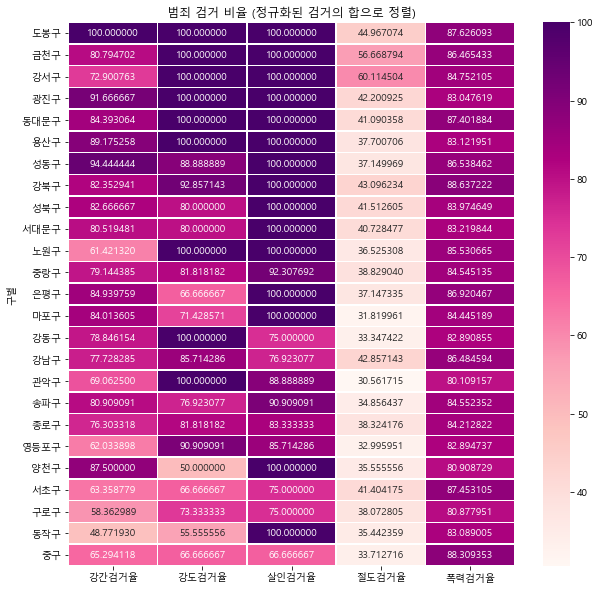

In [261]:
# 범죄 검거 비율 heatmap으로 시각화
target_col = ['강간검거율', '강도검거율', 
              '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', 
                                                ascending=False)
plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], 
            annot=True, fmt='f',linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

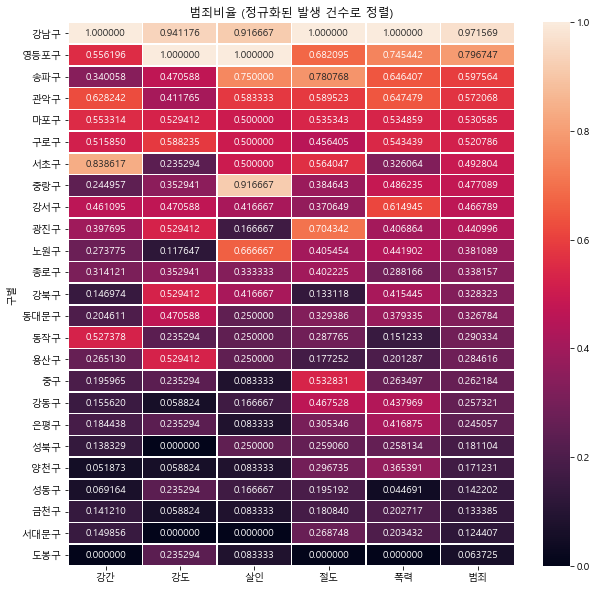

In [262]:
# 범죄 발생 건수 heatmap 시각화
target_col=['강간','강도','살인','절도','폭력','범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', 
ascending=False)

plt.figure(figsize=(10,10))

sns.heatmap(crime_anal_norm_sort[target_col], 
annot=True, fmt='f', linewidth=.5)
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [263]:
# 결과 저장
crime_anal_norm.to_csv('data/crime_in_Seoul_final.csv', sep=',', encoding='utf-8')

In [ ]:
# 지도 시각화

In [269]:
import folium
import matplotlib.pyplot as plt
import json
geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [270]:
# 서울시 중심 경계선 나타내기. 컬러맵 살인 발생 건수.
map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11, tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, 
                          crime_anal_norm['살인']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')

map

C:\Users\harry\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [271]:
# 강간 발생 건수
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['강간'],
               columns = [crime_anal_norm.index, 
                          crime_anal_norm['강간']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')
map

In [272]:
# 범죄 발생건수
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index,
                          crime_anal_norm['범죄']],
               fill_color = 'PuRd', #puRd, YlGnBu
               key_on = 'feature.id')

map

In [273]:
# 서울시 경찰서별 검거율과 구별 범죄 발생율을 동시 시각화
# 경찰서의 위도와 경도 정보 이용
df_raw['lat'] = station_lat
df_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp =df_raw[col] / df_raw[col].max()

df_raw['검거'] = np.sum(tmp, axis=1)

df_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575548,126.984747,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564744,126.966770,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [274]:
#경찰서 위치 표시.
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in df_raw.index:
    folium.Marker([df_raw['lat'][n],
                   df_raw['lng'][n]]).add_to(map)
map

In [275]:
# 검거에 10을 곱해서 원 넓이 정함
# 경찰서의 검거율을 원의 넓이로 표현
map =folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in df_raw.index:
    folium.CircleMarker([df_raw['lat'][n], df_raw['lng'][n]],
                        radius = df_raw['검거'][n]*10,
                        color='#3186cc', 
fill_color='#3186cc').add_to(map)
map

In [276]:
# 범죄 발생 건수 추가.
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index,
                          crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on='feature.id')

for n in df_raw.index:
    folium.CircleMarker([df_raw['lat'][n], df_raw['lng'][n]],
                        radius = df_raw['검거'][n]*10,
                        color='#3186cc', 
                        fill_color='#3186cc').add_to(map)
map

C:\Users\harry\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
